In [ ]:
# Importing libraries
import pandas as pd
import matplotlib.pylab as plt
import numpy as np
## test

# scikit learn packages 
from sklearn.feature_extraction.text import TfidfVectorizer # vectorizer
from sklearn.model_selection import train_test_split # For splitting into test and train data
from sklearn.linear_model import SGDClassifier # SGD classifier - better model for classification
from sklearn.pipeline import Pipeline # Pipeline framework
from sklearn.metrics import make_scorer, cohen_kappa_score
from sklearn.model_selection import GridSearchCV, cross_validate # Library that allows optimization of hyperparameters

In [ ]:
# Path to the data
#data_ghelms = "/Users/gustavhelms/Documents/Cognitive Science/5_semester/Bachelor/political_polarization/Folketinget-Scraping/data/folketinget_2019_2021_raw.csv"
data_mrg = "./data/folketinget_2019_2021_raw.csv"
# Importing data - only a subset 
#df = pd.read_csv(data_ghelms)
df = pd.read_csv(data_mrg)

In [ ]:
df['Parti'].value_counts()

Socialdemokratiet              11194
Venstre                         9737
Dansk Folkeparti                8793
Socialistisk Folkeparti         5496
Enhedslisten                    5181
Radikale Venstre                4044
Nye Borgerlige                  3503
Det Konservative Folkeparti     2361
Alternativet                    2190
Liberal Alliance                2150
Socialdemokraterne               366
Name: Parti, dtype: int64

# Implementing Pipeline

In [ ]:
df2020 = df[df['Year'] == 2020][:1000]

In [ ]:
# Splitting data
X, y = df2020['text'], df2020['Parti']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42, stratify = df2020["Parti"])

In [ ]:
pipe = Pipeline([
('vect', TfidfVectorizer(ngram_range=(1,2))),
('SGD', SGDClassifier(loss='log', 
                      penalty='l2', 
                      shuffle=True,
                      alpha=1e-2,
                      class_weight = 'balanced'))])

grid = GridSearchCV(estimator = pipe,
                        param_grid = {'SGD__alpha': (1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8)},
                        cv=20, # number of cross validations
                        scoring={'kappa_score': make_scorer(cohen_kappa_score)},
                        refit='kappa_score',
                        n_jobs=2)

In [ ]:
# fitting hyper parameters
grid.fit(X_train, y_train)

GridSearchCV(cv=20,
             estimator=Pipeline(steps=[('vect',
                                        TfidfVectorizer(ngram_range=(1, 2))),
                                       ('SGD',
                                        SGDClassifier(alpha=0.01,
                                                      class_weight='balanced',
                                                      loss='log'))]),
             n_jobs=2,
             param_grid={'SGD__alpha': (0.01, 0.001, 0.0001, 1e-05, 1e-06,
                                        1e-07, 1e-08)},
             refit='kappa_score',
             scoring={'kappa_score': make_scorer(cohen_kappa_score)})

Text(69.0, 0.5, 'Truth')

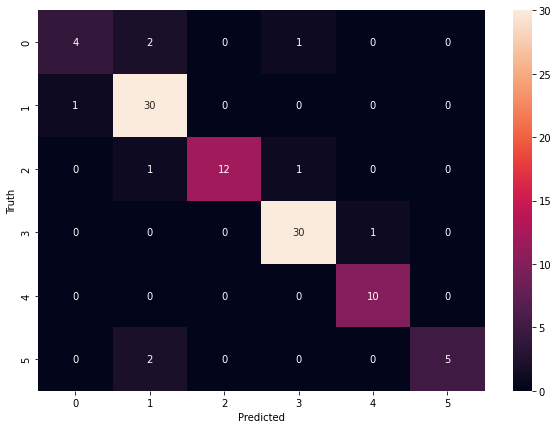

In [ ]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sn

y_pred = grid.predict(X_test)# documentation says the best model is used for prediction
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
# inspect results
results = pd.DataFrame(grid.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_SGD__alpha,params,split0_test_kappa_score,split1_test_kappa_score,split2_test_kappa_score,split3_test_kappa_score,...,split13_test_kappa_score,split14_test_kappa_score,split15_test_kappa_score,split16_test_kappa_score,split17_test_kappa_score,split18_test_kappa_score,split19_test_kappa_score,mean_test_kappa_score,std_test_kappa_score,rank_test_kappa_score
0,0.619437,0.027870,0.029886,0.003645,0.01,{'SGD__alpha': 0.01},0.411765,0.387097,0.387097,0.387097,...,0.419355,0.487544,0.375000,0.475219,0.487909,0.391892,0.451613,0.423813,0.038005,7
1,0.616764,0.034403,0.030649,0.003272,0.001,{'SGD__alpha': 0.001},0.818792,0.629121,0.627843,0.758713,...,0.694293,0.911591,0.692833,0.817073,0.819519,0.757902,0.788591,0.748879,0.083216,6
2,0.557526,0.023804,0.029888,0.003124,0.0001,{'SGD__alpha': 0.0001},0.818792,0.727640,0.724114,0.853229,...,0.820717,0.883495,0.756098,0.879599,0.850697,0.757902,0.820000,0.795149,0.074550,5
3,0.580858,0.034602,0.030499,0.003133,0.00001,{'SGD__alpha': 1e-05},0.850100,0.727640,0.756263,0.853229,...,0.821074,0.882889,0.756098,0.910477,0.850697,0.757902,0.791667,0.808170,0.064445,4
4,0.550474,0.019772,0.028507,0.002933,0.000001,{'SGD__alpha': 1e-06},0.880874,0.762062,0.881266,0.971098,...,0.853801,0.913295,0.851190,0.910950,0.941823,0.882276,0.882889,0.876460,0.049652,1
5,0.561683,0.019226,0.030212,0.003837,0.0,{'SGD__alpha': 1e-07},0.793307,0.790975,0.853896,0.942122,...,0.854932,0.827806,0.762219,0.940633,0.941406,0.882276,0.825130,0.855339,0.054978,2
6,0.554028,0.015042,0.029042,0.003378,0.0,{'SGD__alpha': 1e-08},0.852265,0.793307,0.789720,0.855862,...,0.854932,0.884689,0.737694,0.910596,0.880795,0.884615,0.798335,0.844369,0.049263,3


In [ ]:
set(df['Parti'])

{'Alternativet',
 'Dansk Folkeparti',
 'Det Konservative Folkeparti',
 'Enhedslisten',
 'Liberal Alliance',
 'Nye Borgerlige',
 'Radikale Venstre',
 'Socialdemokraterne',
 'Socialdemokratiet',
 'Socialistisk Folkeparti',
 'Venstre'}

In [ ]:
# loop through years and fit/predict per year, append scores and so on

best_scores = []
best_params = []
precision_scores = []
accuracy_scores = []

for year in df.Year.unique():
    subset = df[df['Year'] == year][:1000]
    X, y = subset["text"], subset["Parti"]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42, stratify = subset["Parti"])
    grid_SGD.fit(X_train, y_train)
    df_train = pd.DataFrame(grid_SGD.cv_results_)
    plt.legend()
    
    # save best kappa score and params generating that score
    best_scores.append(grid_SGD.best_score_)
    best_params.append(grid_SGD.best_params_)
    
    # metrics on test set
    y_pred = grid_SGD.predict(X_test)
    accuracy_scores.append(accuracy_score(y_test, y_pred))
    precision_scores.append(precision_score(y_test, y_pred, average='weighted'))